# CS5785 Homework 4

## PROGRAMMING EXERCISES

## 1. Clusteringfortextanalysis.

#### a.

In [117]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [118]:
import numpy as np
from sklearn import cluster
science2k_doc_word = np.load('/content/gdrive/My Drive/AML-HW4/science2k-doc-word.npy')
print(science2k_doc_word.shape)
print(science2k_doc_word[:1])


(1373, 5476)
[[-0.2521619 -0.2521619  9.36371   ... -0.2521619 -0.2521619 -0.2521619]]


In [119]:
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt

def find_clusters(dataset, n_clusters):
    # initiallize centroid randomly
    rng = np.random.default_rng()
    i = rng.permutation(n_clusters)
    centers = dataset[i]
    
    while True:
        # for every point, assign it to the nearest centroid
        # pairwise_distances_argmin: 
        # Compute minimum distances between one point and a set of points.
        labels = pairwise_distances_argmin(dataset, centers)
        
        # find the index where label is 0
        index_of_label = np.where(labels == 0)[0]

        # calculate the mean of each cluster, and assign it as new centriod
        # Find new centers from means of points
        new_cent = np.array([dataset[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_cent):
            break
        centers = new_cent
    
    return centers, labels

In [120]:
# fit K-Means with K=20
k = 20
model = cluster.KMeans(n_clusters=20)
data = science2k_doc_word
# model.fit(science2k_doc_word[:,[0,1]])
model.fit(data)


KeyboardInterrupt: ignored

In [ ]:
labels = model.labels_
labels = np.reshape(labels, (labels.shape[0], 1))
print(labels.shape, science2k_doc_word.shape)
science2k_doc_word_labels = np.append(science2k_doc_word, labels, axis=1)
# print(labels.shape, science2k_doc_word_labels.shape)
data_by_cluster = []
# data_by_cluster[i] contains all cluster i data.

mi = []
top_ten_words_index = []

for label in range(0,k):
  cur_features = []
  for doc in science2k_doc_word_labels:
    cur_label = int(doc[-1:])
    if cur_label == label:
      cur_features.append(doc)

  cur_features = np.array(cur_features)
  # delete the label column before adding the cur_features list to data_by_cluster
  data_by_cluster.append(np.delete(cur_features, cur_features.shape[1]-1, 1))
  cur_mi = np.mean(data_by_cluster[label], axis=0)
  mi.append(cur_mi)

In [ ]:
# x_bar is a vector, each element is the average of the values for a word across doc
x_bar = np.mean(science2k_doc_word, axis=0)
print(x_bar.shape)
for label in range(0,k):
  cur_mi = mi[label]
  distance = cur_mi - x_bar
  # try to find the index of top 10 words
  top_n = 10
  indices = distance.argsort()[-top_n:]
  top_ten_words_index.append(indices)

In [ ]:
vocab_list = np.loadtxt('/content/gdrive/My Drive/AML-HW4/science2k-vocab.txt', dtype = str)

In [ ]:
for cluster in top_ten_words_index:
  print(vocab_list[cluster])

In [ ]:
title_list = np.loadtxt('/content/gdrive/My Drive/AML-HW4/science2k-titles.txt', delimiter = '\n', dtype = str)
print(title_list[:5])

In [ ]:
for cluster in range(0,k):
  distances = model.transform(data)[:, cluster]
  num_top = 10
  top_index = np.argsort(distances)[::-1][:10]

  print(title_list[top_index])

For that value, report the top 10 words of each cluster in order of the largest positive distance from the average value across all data. More specifically, if x is the 5476-vector of average values across documents and mi is the ith mean, report the words associated with the top components in mi − x. Report the top ten documents that fall closest to each cluster center. You can find the titles in the science2k-titles.txt file.
Comment on these results. What has the algorithm captured? How might such an algorithm be useful?

#### b

In [ ]:
import numpy as np
from sklearn import cluster

# 1373 titles/docs
# 5476 vocabs
# capture term-wise rather than document-wise features.
science2k_word_doc = np.load('/content/gdrive/My Drive/AML-HW4/science2k-word-doc.npy')
print(science2k_word_doc.shape)
print(science2k_word_doc[:10])

In [ ]:
# fit K-Means with K=20
k = 20
model = cluster.KMeans(n_clusters=20)
data = science2k_word_doc
# model.fit(science2k_word_doc[:,[0,1]])
model.fit(data)


labels = model.labels_
labels = np.reshape(labels, (labels.shape[0], 1))
science2k_word_doc_labels = np.append(science2k_word_doc, labels, axis=1)
# print(labels.shape, science2k_word_doc_labels.shape)
data_by_cluster = []
# data_by_cluster[i] contains all cluster i data.

mi = []
top_ten_words_index = []

for label in range(0,k):
  cur_features = []
  for doc in science2k_word_doc_labels:
    cur_label = int(doc[-1:])
    if cur_label == label:
      cur_features.append(doc)

  cur_features = np.array(cur_features)
  # delete the label column before adding the cur_features list to data_by_cluster
  data_by_cluster.append(np.delete(cur_features, cur_features.shape[1]-1, 1))
  cur_mi = np.mean(data_by_cluster[label], axis=0)
  mi.append(cur_mi)

# x_bar is a vector, each element is the average of the values for a word across doc
x_bar = np.mean(science2k_word_doc, axis=0)
for label in range(0,k):
  cur_mi = mi[label]
  distance = cur_mi - x_bar
  # try to find the index of top 10 words
  top_n = 10
  indices = distance.argsort()[-top_n:]
  top_ten_words_index.append(indices)

In [ ]:
print("The top ten words for each cluster")
for cluster in top_ten_words_index:
  print(vocab_list[cluster])

print("\n\n\n", "The top ten documentns for each cluster")
for cluster in range(0,k):
  distances = model.transform(data)[:, cluster]
  num_top = 10
  top_index = np.argsort(distances)[::-1][:10]
  print(title_list[top_index])

## 2：EM Algorithm and its implementation

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

####A

In [4]:
#load data
features = np.loadtxt('/content/gdrive/My Drive/AML-HW4/faithful.dat', skiprows=26, usecols=(1,2), dtype = np.float)

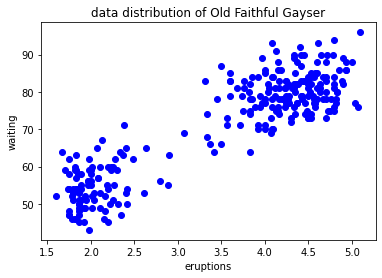

In [5]:
plt.scatter(features[:,0],features[:,1], c='b')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.title('data distribution of Old Faithful Gayser')
plt.show()

####b

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import random


In [ ]:
#reference:
#https://blog.csdn.net/XiaoPANGXia/article/details/53542666?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522160615069319724842919994%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=160615069319724842919994&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v28-13-53542666.pc_first_rank_v2_rank_v28&utm_term=GMM+

In [10]:

#define all paramters we will use and take initial guess
parameter = {}
parameter['Miu_1'] = np.array([0, 0])
parameter['Miu_2'] = np.array([0, 0])
parameter['Sigma_1'] = np.array([[1, 0], [0, 1]])
parameter['Sigma_2'] = np.array([[1, 0], [0, 1]])
#since we only have 2 components, the fraction of the dataset for every cluster is 0.5
parameter['Pi_weight'] = 0.5
parameter['gama_list'] = []


def set_param(miu_1, sigma_1, miu_2, sigma_2,pi_weight):
  parameter['Miu_1'] = Miu_1
  parameter['Miu_1'].shape = (2,1)
  parameter ['Sigma_1'] = sigma_1
  parameter['Miu_2'] = Miu_2
  parameter['Miu_2'].shape = (2,1)
  parameter ['Sigma_2'] = sigma_2
  parameter['Pi_weight']  = pi_weight

#The points within every cluster follow a normal distribution
#return probability density of the x
def PDF(data, miu, sigma):
  sigma_sqrt = math.sqrt(np.linalg.det(sigma)) 
  sigma_inv = np.linalg.inv(sigma)
  data.shape = (2,1)
  miu.shape = (2,1)
  minus_miu = data-miu
  minus_miu_trans = np.transpose(minus_miu)
  res = (1.0 / (2.0 * math.pi * sigma_sqrt)) * math.exp((-0.5) * (np.dot(np.dot(minus_miu_trans, sigma_inv), minus_miu)))

  return res

 #Computer responsibilitries
 #For each xi, the probability of it is generated by Kth component 
def E_step(Data):
  sigma_1 = parameter['Sigma_1']
  sigma_2 = parameter['Sigma_2']
  pi = parameter['Pi_weight']
  miu_1 = parameter['Miu_1']
  miu_2 = parameter['Miu_2']
  parameter['gama_list'] = []

  for point in Data:
    gama =  (pi*PDF(point, miu_2, sigma_2))/(
             (1.0 - pi)*PDF(point, miu_1, sigma_1) + pi* PDF(point, miu_2, sigma_2))
    parameter['gama_list'].append(gama)

#compute weighted means and variances  
def M_step(Data):
  N_1 = 0
  N_2 = 0
  num = len(parameter['gama_list'])
  for i in range(num):
    N_1 += 1.0 - parameter['gama_list'][i]
    N_2 += parameter['gama_list'][i]

  #update miu1, miu2
  new_miu_1 = np.array([0, 0])
  new_miu_2 = np.array([0, 0])
  for i in range(num):
    new_miu_1 = new_miu_1 + Data[i]* (1 - parameter["gama_list"][i]) / N_1
    new_miu_2 = new_miu_2 + Data[i] * parameter['gama_list'][i] / N_2
  #reshape 
  new_miu_1.shape = (2,1)
  new_miu_2.shape = (2,1)

  #update sigma1, sigma2
  new_sigma_1 = np.array([[0, 0], [0, 0]])
  new_sigma_2 = np.array([[0, 0], [0, 0]])
  for i in range(num):
    data_tmp = [0,0]
    data_tmp[0] = Data[i][0]
    data_tmp[1] = Data[i][1]
    vec_tmp = np.array(data_tmp)
    vec_tmp.shape = (2,1)

    new_sigma_1 = new_sigma_1 + np.dot((vec_tmp - new_miu_1), (vec_tmp - new_miu_1).transpose()) * (1.0 - parameter['gama_list'][i]) / N_1
    new_sigma_2 = new_sigma_2 + np.dot((vec_tmp - new_miu_2), (vec_tmp - new_miu_2).transpose()) * parameter['gama_list'][i] / N_2
  #update pi_weight
  new_pi = N_2/num

  #update parameter dictionary
  parameter['Miu_1'] = new_miu_1
  parameter['Miu_2'] = new_miu_2
  parameter['Sigma_1'] = new_sigma_1
  parameter['Sigma_2'] = new_sigma_2
  parameter['Pi_weight'] = new_pi
   

In [11]:
def EM_iterate(iter_time, Data, miu_1, sigma_1, miu_2, sigma_2, pi_weight, esp=0.0001 ):
  '''
  iter_time = # of total iteration, if null, iterates till termination criterion
  esp: termination criterion, default is 0.0001
  '''
  set_param(miu_1, sigma_1, miu_2, sigma_2, pi_weight)
  if iter_time == None:
    while(True):
      old_miu_1 = parameter['Miu_1'].copy()
      old_miu_2 = parameter['Miu_2'].copy()
      E_step(Data)
      M_step(Data)
      delta_1 = parameter['Miu_1'] - old_miu_1
      delta_2 = parameter['Miu_2'] - old_miu_2
      if math.fabs(delta_1[0]) < esp and math.fabs(delta_1[1]) < esp and math.fabs(delta_2[0]) < esp and math.fabs(delta_2[1]) < esp:
        break
  else:
    for i in range(iter_time):
      pass



In [68]:
#EM iterate while displaying the traces of two mean
def EM_iterate_trajectories(iter_time, Data, miu_1, sigma_1, miu_2, sigma_2, pi_weight, esp=0.0001):
  mean_trace_1 = [[], []]
  mean_trace_2 = [[], []]
  set_param(miu_1, sigma_1, miu_2, sigma_2, pi_weight)
  if iter_time == None:
    while (True):
      old_miu_1 = parameter['Miu_1'].copy()
      old_miu_2 = parameter['Miu_2'].copy()
      E_step(Data)
      M_step(Data)
      delta_1 = parameter['Miu_1'] - old_miu_1
      delta_2 = parameter['Miu_2'] - old_miu_2
      mean_trace_1[0].append(parameter['Miu_1'][0][0])
      mean_trace_1[1].append(parameter['Miu_1'][1][0])
      mean_trace_2[0].append(parameter['Miu_2'][0][0])
      mean_trace_2[1].append(parameter['Miu_2'][1][0])
      if math.fabs(delta_1[0]) < esp and math.fabs(delta_1[1]) < esp and math.fabs(delta_2[0]) < esp and math.fabs(delta_2[1]) < esp:
        break
  else:
    for i in range(iter_time):
      pass

 #trace 1
  plt.subplot(121)
  plt.xlim(xmax=5, xmin=2)
  plt.ylim(ymax=90, ymin=60)
  plt.xlabel("eruptions")
  plt.ylabel("waiting")
  plt.plot(mean_trace_1[0], mean_trace_1[1], 'r-')
  plt.plot(mean_trace_1[0], mean_trace_1[1], 'b^')

  #trace 2 
  plt.subplot(122)
  plt.xlim(xmax=4, xmin=0)
  plt.ylim(ymax=60, ymin=40)
  plt.xlabel("eruptions")
  plt.ylabel("waiting")
  plt.plot(mean_trace_2[0], mean_trace_2[1], 'r-')
  plt.plot(mean_trace_2[0], mean_trace_2[1], 'bo')
  plt.show()


#return # of iteration
def EM_iterate_times(Data, miu_1, sigma_1, miu_2, sigma_2, pi_weight, esp=0.0001):
  set_param(miu_1,sigma_1,miu_2,sigma_2,pi_weight)
  iter_times = 0
  while(True):
    iter_times += 1
    old_miu_1 = parameter['Miu_1'].copy()
    old_miu_2 = parameter['Miu_2'].copy()
    E_step(Data)
    M_step(Data)
    delta_1 = parameter['Miu_1'] - old_miu_1
    delta_2 = parameter['Miu_2'] - old_miu_2
    if math.fabs(delta_1[0]) < esp and math.fabs(delta_1[1]) < esp and math.fabs(delta_2[0]) < esp and math.fabs(delta_2[1]) < esp:
      break
  return iter_times


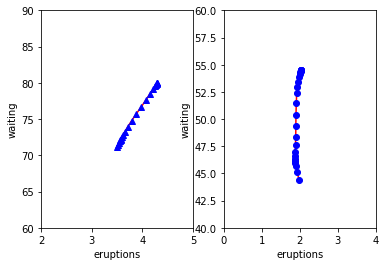

In [69]:
#Take initial guess for miu_1, miu_2, sigma_1, sigma_2
#plot the trajectories of two mean 
Data = features[:,[0,1]]
Miu_1 = np.array([10,60])
Sigma_1 = np.array([[10, 0], [0, 10]])
Miu_2 = np.array([2, 30])
Sigma_2 = np.array([[10, 0], [0, 10]])
Pi_weight = 0.5

EM_iterate_trajectories(None, Data, Miu_1, Sigma_1, Miu_2, Sigma_2, Pi_weight)

In [ ]:
from random import randint
iter_times = []
Data = features[:,[0,1]]
Pi_weight = 0.5
for i in range(50):
  Miu_1_0 = randint(0, 10)
  Miu_1_1 = randint(50, 100)
  Miu_1 = np.array([Miu_1_0, Miu_1_1])
  Sigma_1 = np.array([[10, 0], [0, 10]])
  Sigma_2 = np.array([[10,0], [0, 10]])
  Miu_2_0 = randint(0,10)
  Miu_2_1 = randint(50,100)
  Miu_2 = np.array([Miu_2_0, Miu_2_1])
  iteration = EM_iterate_times(Data,Miu_1,Sigma_1,Miu_2,Sigma_2,Pi_weight)
  iter_times.append(iteration)

Text(0, 0.5, 'the number of iteration')

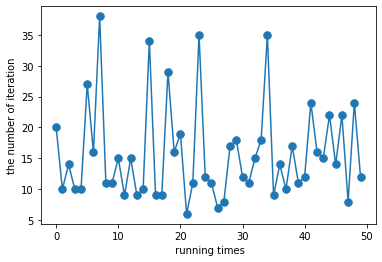

In [22]:
ks = range(50)
plt.plot(ks,iter_times, '.-', markersize=15 )
plt.xlabel(' running times')
plt.ylabel('the number of iteration')

#### C

In [101]:
import random

def euclDistance(vector1, vector2):
   return np.sqrt(sum((vector2 - vector1) ** 2))

#figure our centroid（mean）
def initCentroid(data, k):
  numSamples, dim = data.shape
  #we have k centroids
  centroids = np.zeros((k,dim))

  for i in range(k):
    index = int(np.random.uniform(0, numSamples))
    centroids[i,:] = data[index,:]
  
  return centroids
  
def kmeans(data, k):
  numSamples = data.shape[0]
  clusterData = np.array(np.zeros((numSamples,2)))
  clusterChanged = True
  centroids = initCentroid(data,k)
  covariance = []
  covariance.append((0,0))
  covariance.append((0,0))
  
  while clusterChanged:
    clusterChanged = False
    #iterate every sample
    for i in range(numSamples):
      minDist = 100000
      minIndex = 0
      #update minDist
      for j in range(k):
        distance = euclDistance(centroids[j,:], data[i,:])
        if distance < minDist:
          minDist = distance
          clusterData[i,1] = minDist
          minIndex = j
      if clusterData[i,0] != minIndex:
        clusterChanged = True
        clusterData[i,0] = minIndex
      #update centroid
    for j in range(k):
        cluster_index = np.nonzero(clusterData[:,0] == j)
        #discover all points in this cluster
        pointsInCluster = data[cluster_index]
        #calculate
        centroids[j,:] = np.mean(pointsInCluster, axis = 0)
        x = np.array(pointsInCluster).T
        covariance[j] = np.cov(x)
        
        #print(np.mean(pointsInCluster, axis = 0))
  return centroids,covariance,clusterData


In [85]:
 def showCluster(data, k, centroids, clusterData):
   numSamples,dim = data.shape
   if dim != 2:
     print('dimension of data is not 2 !')
     return 1
   
   mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'dr', '<r', 'pr']
   if k > len(mark):
     print('k is too large !')
     return 1

   #plot
   for i in range(numSamples):
     markIndex = int(clusterData[i,0])
     plt.plot(data[i,0], data[i,1], mark[markIndex])
     

  
   #indicate the centroid
   for i in range(k):
     plt.plot(centroids[i,0], centroids[i,1], marker = 'D',markersize=20)
   plt.show()



show cluster!


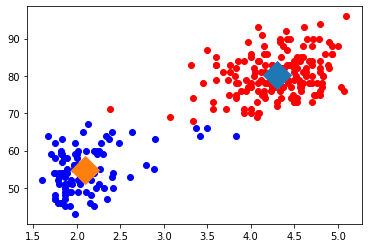

centroids is [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
covariance is [array([[ 0.17865587,  0.76756385],
       [ 0.76756385, 31.66690466]]), array([[ 0.15583707,  0.99561869],
       [ 0.99561869, 34.75505051]])]


In [106]:
Data = features[:,[0,1]]
k = 2
centroids, covariance,clusterData = kmeans(Data, k)
if np.isnan(centroids).any():
  print('error happens')
else:
  print('show cluster!')

showCluster(Data, k, centroids, clusterData)
print('centroids is', centroids)
print('covariance is', covariance)

#### C-traces

In [ ]:
#traces
#Sigma_1, Sigma_2, Miu_1, Miu_2 are generated by K-Means
#Directly put them into EM_iterate_trajectories() which will set these
#as initial paramters and therefor be utilized by EM
Data = features[:,[0,1]]
Miu_1 = np.array([4.29793023,80.28488372])
Sigma_1 = np.array([[0.17865587, 0.76756385], [0.76756385, 31.66690466]])
Miu_2 = np.array([2.09433,54.75])
Sigma_2 = np.array([[0.15583707,  0.99561869], [0.99561869, 34.75505051]])
Pi_weight = 0.5
EM_iterate_trajectories(None, Data, Miu_1, Sigma_1, Miu_2, Sigma_2, Pi_weight)

#### C- iteration

In [ ]:
for i in range(50)：
run k-means 50 次
得到 sigma-1, sigma-2, miu-1, miu_2
带入EM-iter_times 得到iteration然后append


In [105]:
#update parameters generated by K-Mean in E_step

def E_step_2(Data):
  sigma_1 = np.array([[0.15583707,  0.99561869],[0.99561869, 34.75505051]])
  sigma_2 = np.array([[ 0.17865587,  0.76756385],[0.76756385, 31.66690466]])
  pi = parameter['Pi_weight']
  miu_1 = np.array([4.29793023, 80.28488372])
  miu_2 = np.array([2.09433  ,  54.75 ])
  parameter['gama_list'] = []
  
  for point in Data:
    gama =  (pi*PDF(point, miu_2, sigma_2))/(
             (1.0 - pi)*PDF(point, miu_1, sigma_1) + pi* PDF(point, miu_2, sigma_2))
    parameter['gama_list'].append(gama)


In [112]:
E_step_2(features[:,[0,1]])
M_step(features[:,[0,1]])

print('miu_1 is',parameter['Miu_1'])
print('miu_2 is',parameter['Miu_2'])
print('sigma_1 is', parameter['Sigma_1'])
print('sigma_2 is', parameter['Sigma_2'])

miu_1 is [[ 4.29728175]
 [80.06062508]]
miu_2 is [[ 2.05026303]
 [54.62425826]]
sigma_1 is [[ 0.16230645  0.84365716]
 [ 0.84365716 34.985571  ]]
sigma_2 is [[ 0.08447782  0.59369895]
 [ 0.59369895 35.10037224]]


In [117]:
def EM_iterate_trajectories_2(iter_time, Data, miu_1, sigma_1, miu_2, sigma_2, pi_weight, esp=0.0001):
  mean_trace_1 = [[], []]
  mean_trace_2 = [[], []]
  set_param(miu_1, sigma_1, miu_2, sigma_2, pi_weight)
  if iter_time == None:
    while (True):
      old_miu_1 = parameter['Miu_1'].copy()
      old_miu_2 = parameter['Miu_2'].copy()
      E_step_2(Data)
      M_step(Data)
      delta_1 = parameter['Miu_1'] - old_miu_1
      delta_2 = parameter['Miu_2'] - old_miu_2
      mean_trace_1[0].append(parameter['Miu_1'][0][0])
      mean_trace_1[1].append(parameter['Miu_1'][1][0])
      mean_trace_2[0].append(parameter['Miu_2'][0][0])
      mean_trace_2[1].append(parameter['Miu_2'][1][0])
      if math.fabs(delta_1[0]) < esp and math.fabs(delta_1[1]) < esp and math.fabs(delta_2[0]) < esp and math.fabs(delta_2[1]) < esp:
        break
  else:
    for i in range(iter_time):
      pass

 #trace 1
  plt.subplot(121)
  #plt.xlim(xmax=5, xmin=2)
  #plt.ylim(ymax=90, ymin=60)
  plt.xlabel("eruptions")
  plt.ylabel("waiting")
  plt.plot(mean_trace_1[0], mean_trace_1[1], 'r-')
  plt.plot(mean_trace_1[0], mean_trace_1[1], 'b^')

  #trace 2 
  plt.subplot(122)
  #plt.xlim(xmax=4, xmin=0)
  #plt.ylim(ymax=60, ymin=40)
  plt.xlabel("eruptions")
  plt.ylabel("waiting")
  plt.plot(mean_trace_2[0], mean_trace_2[1], 'r-')
  plt.plot(mean_trace_2[0], mean_trace_2[1], 'bo')
  plt.show()


#return # of iteration
def EM_iterate_times_2(Data, miu_1, sigma_1, miu_2, sigma_2, pi_weight, esp=0.0001):
  set_param(miu_1,sigma_1,miu_2,sigma_2,pi_weight)
  iter_times = 0
  while(True):
    iter_times += 1
    old_miu_1 = parameter['Miu_1'].copy()
    old_miu_2 = parameter['Miu_2'].copy()
    E_step_2(Data)
    M_step(Data)
    delta_1 = parameter['Miu_1'] - old_miu_1
    delta_2 = parameter['Miu_2'] - old_miu_2
    if math.fabs(delta_1[0]) < esp and math.fabs(delta_1[1]) < esp and math.fabs(delta_2[0]) < esp and math.fabs(delta_2[1]) < esp:
      break
  return iter_times


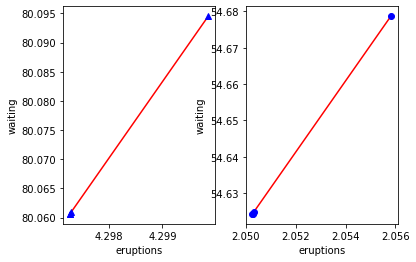

In [118]:
Data = features[:,[0,1]]
Miu_1 = np.array([ 4.29728175,80.06062508])  

Sigma_1 = np.array([[0.16230645, 0.84365716], [0.84365716,34.985571 ]])
Miu_2 = np.array([2.05026303,54.62425826 ])  

Sigma_2 = np.array([[0.08447782,0.59369895], [ 0.59369895,35.10037224]])
Pi_weight = 0.5

EM_iterate_trajectories_2(None, Data, Miu_1, Sigma_1, Miu_2, Sigma_2, Pi_weight)

In [125]:
#run the program for 50 times and show the distribution of iteration
from random import randint
iter_times = []
Data = features[:,[0,1]]
Pi_weight = 0.5
for i in range(50):
  Miu_1_0 = randint(0, 10)
  Miu_1_1 = randint(50, 100)
  Miu_1 = np.array([Miu_1_0, Miu_1_1])
  Sigma_1 = np.array([[10, 0], [0, 10]])
  Sigma_2 = np.array([[10,0], [0, 10]])
  Miu_2_0 = randint(0,10)
  Miu_2_1 = randint(50,100)
  Miu_2 = np.array([Miu_2_0, Miu_2_1])
  iteration = EM_iterate_times_2(Data,Miu_1,Sigma_1,Miu_2,Sigma_2,Pi_weight)
  iter_times.append(iteration)

Text(0, 0.5, 'the number of iteration')

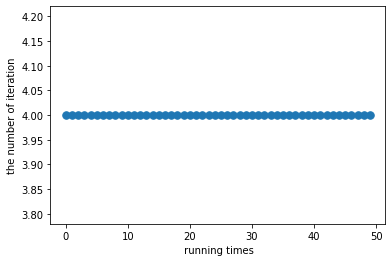

In [126]:
ks = range(50)
plt.plot(ks,iter_times, '.-', markersize=15 )
plt.xlabel(' running times')
plt.ylabel('the number of iteration')

## 3：Eigenface for face recognition

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(540, 2500) (540,)


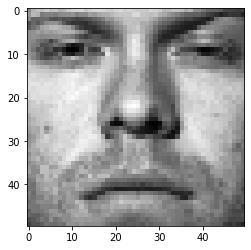

In [ ]:
import numpy as np
from scipy import misc
from matplotlib.pyplot import imread
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
for line in open('/content/gdrive/My Drive/AML-HW4/faces/train.txt'):
  # im = imageio.imread(line.strip().split()[0])
  # im = misc.imread(line.strip().split()[0])
  path = line.strip().split()[0]
  new_path = path.replace("./", "/content/gdrive/My Drive/AML-HW4/")
  im = imread(new_path)
  train_data.append(im.reshape(2500,))
  train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()


(100, 2500) (100,)


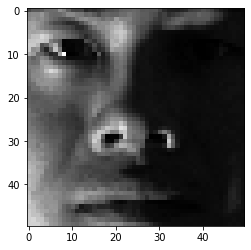

In [ ]:
test_labels, test_data = [], []
for line in open('/content/gdrive/My Drive/AML-HW4/faces/test.txt'):
  # im = imageio.imread(line.strip().split()[0])
  # im = misc.imread(line.strip().split()[0])
  path = line.strip().split()[0]
  new_path = path.replace("./", "/content/gdrive/My Drive/AML-HW4/")
  im = imread(new_path)
  test_data.append(im.reshape(2500,))
  test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

#### c. Average Face


[[0.01960784 0.02745098 0.02745098 ... 0.05098039 0.07843138 0.12156863]
 [0.25490198 0.29019609 0.29019609 ... 0.43529412 0.41568628 0.3764706 ]
 [0.39607844 0.45490196 0.50980395 ... 0.23921569 0.20392157 0.16078432]
 [0.4509804  0.50980395 0.56470591 ... 0.23137255 0.21176471 0.19215687]
 [0.36862746 0.44705883 0.4509804  ... 0.29803923 0.26274511 0.27450982]]
[0.23236021 0.22000727 0.20557735 ... 0.26361656 0.25340596 0.23245462]


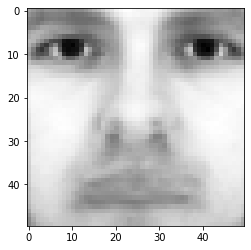

In [ ]:
train_data.shape
# 540 training images and each image has 2500 pixels(50x50)
print(train_data[:5])

average_face = np.mean(train_data, axis=0)
print(average_face)
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

#### d. Mean Subtraction


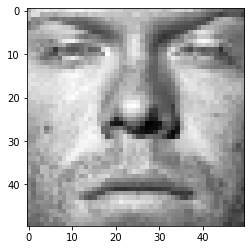

In [ ]:
# Subtract average face μ from every row in X.
# for training dataset
subtracted_train = train_data - average_face
plt.imshow(subtracted_train[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

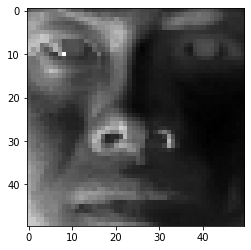

In [ ]:
# for testing dataset
subtracted_test = test_data - average_face
plt.imshow(subtracted_test[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

#### e.Eigenface


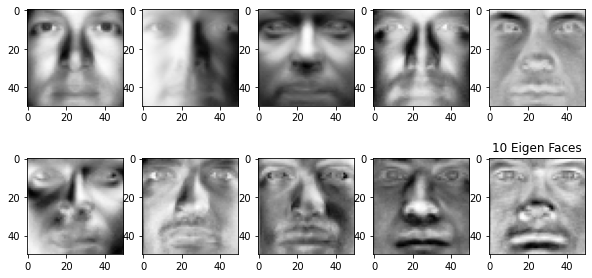

In [ ]:
A = subtracted_train
U, S, Vt = np.linalg.svd(A) 

plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(Vt[i, :].reshape(50, 50), cmap = cm.Greys_r)
plt.title('10 Eigen Faces')
plt.show()

#### f.Eigenface Feature

In [ ]:
# to get F, multiply X to the transpose of first r rows of VT , 
def get_feature_vec(r_row, X_data):
  r = r_row
  X = X_data
  F = X.dot(np.transpose(Vt[:r,:]))
  return F

# Getting the feature matrix F
r = 20
F_train = get_feature_vec(r, train_data)
F_test = get_feature_vec(r, test_data)
# F should have same number of rows as X and r columns
print(train_data.shape, test_data.shape)
print(F_train.shape, F_test.shape)

(540, 2500) (100, 2500)
(540, 20) (100, 20)
